In [1]:
from selenium import webdriver
import requests
from bs4 import BeautifulSoup
import time
from datetime import datetime
from selenium.common.exceptions import NoSuchElementException
from datetime import date
from selenium.webdriver.common.by import By
import pandas as pd
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
import warnings
import re
import sys



In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url = 'https://www.ultimate-guitar.com/explore?genres[]=14&order=artistname_asc&page=30&type[]=Chords'
# test = 'https://www.google.com/'
# browser = webdriver.Chrome(executable_path='D:/Study/TCD/Text_Analytics/Scrapper/chromedriver')

table_xpath = '//*[@id="listAlbum"]/div/a'

driver.get(url)
# time.sleep(5)


matchs = driver.find_elements(By.XPATH,table_xpath)

for m in matchs:

    link = m.get_attribute("href")
    print(link)

    lyric_driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    lyric_url = link
    lyric_xpath = '/html/body/div[2]/div[2]/div[2]/div[5]'

    lyric_driver.get(lyric_url)

    lyric_div = lyric_driver.find_element(By.XPATH,lyric_xpath)

    lyrics = lyric_div.text

    pattern = r"\[.*?\]"
    cleaned_text = re.sub(pattern, "", lyrics)
    cleaned_text = cleaned_text.replace("[", "").replace("]", "")

    text = os.linesep.join([s for s in cleaned_text.splitlines() if s])

    print(text)

    print("...........................................")

    lyric_driver.quit()


driver.quit()

The One Below Is the One

In [7]:


warnings.simplefilter(action='ignore', category=FutureWarning)


url = "https://www.ultimate-guitar.com/explore?decade[]=2010&genres[]=4&order=artistname_asc&type[]=Chords"

nxt_btn = "/html/body/div[2]/div[2]/main/div[2]/div[2]/section/div[1]/div/a[11]"

artist_xpath = "/html/body/div[2]/div[2]/main/div[2]/div[2]/section/article/div/div/div[1]/span"

table_xpath = "/html/body/div[2]/div[2]/main/div[2]/div[2]/section/article/div/div/div[2]/header/span/span/a"

table_xpath2 = '/html/body/div[2]/div[2]/main/div[2]/article[1]/section[2]/article/section[3]/div/section/code/pre/span/span[1]'

lyrics_xpath = "/html/body/div[2]/div[2]/main/div[2]/article[1]/section[2]/article/section[3]/div/section/code/pre/span/span[2]"

final_df = pd.DataFrame({'Artist':[],'Song': [], 'Lyric': [], 'Chords': []})

i = 0

flag = 0

try:

    while flag == 0:

        driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

        # btn = driver.find_element(By.XPATH,nxt_btn)
        # print(btn.text)

        driver.get(url)
        # time.sleep(5)

        matchs = driver.find_elements(By.XPATH,table_xpath)
        artists = driver.find_elements(By.XPATH,artist_xpath)
        driver.minimize_window()

        if(len(artists)!=0):
            artists.pop(0)

        print(len(matchs),len(artists))

        for m,a in zip(matchs,artists):
            song = m.text

            match = re.search(r'\(.*\)', song)
            if match:
                continue

            artist = a.text
            # print(i)
            # i += 1
            driver2 = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
            driver2.get(m.get_attribute("href"))
            time.sleep(5)
            driver2.minimize_window()
            

            matchs = driver2.find_elements(By.XPATH,lyrics_xpath)

            rem = [
                "A", "A#", "Bb", "B", "C", "C#", "Db", "D", "D#", "Eb", "E", "F",
                "F#", "Gb", "G", "G#", "Ab", "Am", "A#m", "Bbm", "Bm", "Cm", "C#m",
                "Dbm", "Dm", "D#m", "Ebm", "Em", "Fm", "F#m", "Gbm", "Gm", "G#m", "Abm",
                "Asus2", "A#sus2", "Bsus2", "Csus2", "C#sus2", "Dbsus2", "Dsus2","Dsus","Dsus4", 
                "D#sus2", "Ebsus2", "Esus2", "Fsus2", "F#sus2", "Gbsus2", "Gsus2","sus2"
                "G#sus2", "Asus4", "A#sus4", "Bsus4", "Csus4", "C#sus4", "Dbsus4",
                "Dsus4", "D#sus4", "Ebsus4", "Esus4", "Fsus4", "F#sus4", "Gbsus4",
                "Gsus4", "G#sus4","|","-","="
            ]

            lyrics = ""
            for m in matchs:
                line = m.text
                result = re.sub(r'\|.*?\|', '', line)
                result = result.replace('|', '')  # remove any remaining '|' characters
                result = result.strip()
                for s in rem:
                    result = result.replace(s, '')


                lyrics += " " + result

            # print(lyrics)

            # driver.get(url)
            

            df = pd.DataFrame(columns=['chord', 'length'])

            matchs = driver2.find_elements(By.XPATH,table_xpath2)

            for m in matchs:

                chord = []
                ln = []

                chords_dict = []

                org = 234

                sz = (len(m.find_elements(By.XPATH,"./*")))

                i = 0

                for u in m.find_elements(By.XPATH, './/span'):

                    x = int(u.location['x'])
                    pos = x - org
                    chord.append(u.text)

                    if i == 0:
                        ln.append(pos)
                    else:
                        ln.append((pos-prv_pos)/2)
                        ln[i-1] = ln[i-1] + ((pos-prv_pos)/2)

                    if i == (sz - 1) and i != 0:
                        ln[i] = ln[i] + ((pos-prv_pos)/2)

                    

                    prv_pos = pos

                    i = i + 1

                    try:
                        if ln[0] == 0 and sz == 1:
                            ln[0] = 50
                    except:
                        print("Empty")
                    
                    new_df = pd.DataFrame({'chord': chord, 'length': ln})

                    df = pd.concat([df, new_df], ignore_index=True)
        
        


            # print(df)

            arr = list(zip(df['chord'], df['length']))

                

            row = {'Artist':artist,'Song': song, 'Lyric': lyrics,'Chords': arr}

            print(str(artist)+":"+str(song)+":"+str(final_df.Artist.nunique()))

            final_df = final_df.append(row, ignore_index=True)

            # print(final_df)

            # print(final_df.Artist.nunique())
            # if final_df.Artist.nunique() == 51:
            #     sys.exit()

            driver2.quit()


        btn = driver.find_element(By.XPATH,nxt_btn)
            # print(btn.text)
            
        # check if next button is present
        if btn == None:
            flag = 1
            break

        url = (btn.get_attribute("href"))
      
        

        
        driver.quit()
            # time.sleep(5)
except:
            print(final_df.shape)
            print(url)
            final_df.to_csv("rock_2010_1_backup.csv",index=False)

# matchs = driver.find_element(By.XPATH,nxt_btn)
# print(matchs)
print(final_df.shape)
print(url)
final_df.to_csv("rock_2010_1.csv",index=False)
   

In [3]:
print(final_df.shape)
print(url)
final_df.to_csv("rock_chords1.csv",index=False)

(72, 4)
https://www.ultimate-guitar.com/explore?decade[]=2020&genres[]=4&order=artistname_asc&type[]=Chords


In [43]:

combined_data = pd.DataFrame()

for file_name in ['1_10_chords.csv', '2_10_chords.csv', '3_100pg_chords.csv','4_100pg_chords.csv']:
    data = pd.read_csv(file_name)
    # use the concat method to append the data to the combined_data dataframe, but only if it doesn't already exist
    combined_data = pd.concat([combined_data, data.drop_duplicates()], ignore_index=True)

# write the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)


In [19]:
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

combined_data = pd.read_csv('final/rock_2010.csv')
combined_data.drop_duplicates(subset=['Artist', 'Song'], inplace=True)
combined_data['Language'] = combined_data['Lyric'].apply(detect_language)


In [20]:
english_artists_df = combined_data.dropna(how='any')


In [21]:
def remove_extra_whitespace(string):
    if isinstance(string, str):
        words = string.split()
        return ' '.join(words)
    else:
        return string

In [22]:
english_artists_df['Lyric'] = english_artists_df['Lyric'].apply(remove_extra_whitespace)

# english_artists_df.to_csv('eng_pop_2010.csv', index=False)

In [23]:
# create a boolean mask to filter out the rows that are not in English
english_mask = english_artists_df['Language'] == 'en'

# filter the DataFrame to include only the rows that are in English
english_df = english_artists_df.loc[english_mask]

# print the resulting DataFrame
# print(english_df)


In [24]:
english_df.to_csv('final/onlyEng_rock_2010.csv', index=False)


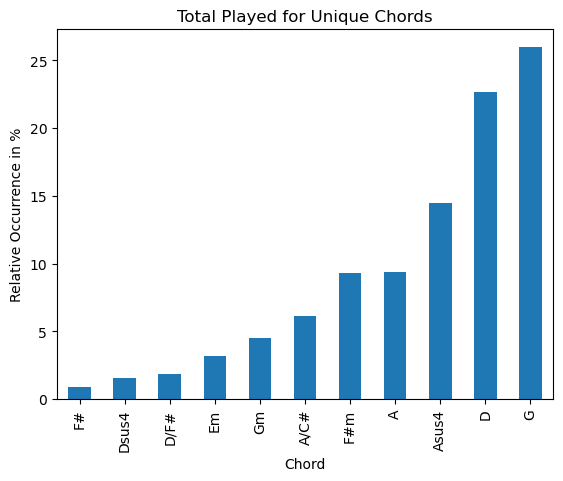

In [7]:
grouped_df = df.groupby('chord')['length'].sum()

# calculate the percentage of the sum of lengths for each chord
percentage_df = grouped_df / grouped_df.sum() * 100

# sort the percentage DataFrame by the percentage values in ascending order
percentage_df = percentage_df.sort_values()

# plot a bar graph of the percentages for each chord
ax = percentage_df.plot(kind='bar', ylim=(0, None))
plt.xlabel('Chord')
plt.ylabel('Relative Occurrence in %')
plt.title('Total Played for Unique Chords')
plt.show()

In [25]:
temp = pd.read_csv('final/onlyEng_rock_2010.csv')

In [26]:
(temp['Chords'][1])

"[('D', 0), ('D', 148.5), ('A', 297.0), ('Em', 336), ('G', 250), ('D', 0), ('D', 199.0), ('A', 398.0), ('Em', 398), ('G', 242), ('Em', 32), ('Em', 98.0), ('G', 132.0), ('D', 0), ('D', 86.0), ('A', 172.0), ('Em', 0), ('Em', 109.5), ('G', 219.0), ('A', 133), ('D', 86), ('A', 0), ('A', 140.5), ('Em', 281.0), ('G', 94), ('G', 168.0), ('D', 148.0), ('D', 0), ('D', 172.0), ('A', 344.0), ('Em', 375), ('G', 305), ('D', 0), ('D', 203.0), ('A', 406.0), ('Em', 422), ('G', 50), ('Em', 0), ('Em', 74.5), ('G', 149.0), ('D', 0), ('D', 78.5), ('A', 157.0), ('Em', 0), ('Em', 82.0), ('G', 164.0), ('A', 118), ('D', 94), ('A', 0), ('A', 156.5), ('Em', 313.0), ('G', 94), ('D', 50), ('A', 0), ('A', 137.0), ('Em', 274.0), ('G', 118), ('D', 118), ('D', 71), ('D', 82.5), ('A', 11.5), ('D', 82.5), ('A', 23.5), ('Em', 12.0), ('D', 82.5), ('A', 23.5), ('Em', 27.5), ('G', 31.0), ('Em', 180), ('G', 32), ('D', 40), ('A', 47), ('Em', 47), ('G', 63), ('D', 79), ('A', 86), ('D', 86), ('A', 0), ('A', 160.0), ('Em', 320.

Mapping the chords to unique chars

In [27]:
fnlChords = []

for i in range(len(temp)):
    s = str(temp['Chords'][i])
    # Evaluate the string as a Python expression
    lst = eval(s)

    # Initialize two empty arrays and a dictionary for mappings
    arr1 = []
    arr2 = []

    # Iterate over tuples and map strings to characters
    for tpl in lst:
        str_val = tpl[0]
        arr1.append(str_val)
        arr2.append(tpl[1])

    # Map each unique value in arr2 to an integer between 1 to the size of the set of unique values
    # Create a set of unique values in the list
    unique_values = set(arr2)

    # Sort the unique values in ascending order
    sorted_values = sorted(unique_values)

    # Create a dictionary that maps each unique value to an integer
    mapping_len = {}
    for i, value in enumerate(sorted_values):
        mapping_len[value] = i + 1

    # Map each value in the list to an integer using the dictionary
    integers = [mapping_len[value] for value in arr2]

    arr2 = integers

    # print(arr1)

    # mapped_notes = [mapping_chord[note] for note in arr1]

    # arr1 = mapped_notes

    output = []
    for i in range(len(arr1)):
        # output += arr1[i] * arr2[i]
        output += [arr1[i]] * arr2[i]


    fnlChords.append(output)

temp['Final'] = fnlChords


In [28]:

print(''.join(temp['Final'][7]))
print(temp['Chords'][7])

CCCCCCCE7E7E7E7E7E7E7AmAmAmAmAmAmAmAmAmAmAmAmAmAmAmAmAmAmFadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmAmAmAmAmAmFadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCCCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCCCCCCCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCCCCCAmAmAmAmE7E7E7E7Fadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmAmAmAmAmAmAmFadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9Fadd9CCCCCCCCCCCCCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCCCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCCCCCCCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCCCCCCCCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fadd9CCCCE7E7E7E7AmAmAmAmFadd9Fadd9Fadd9Fad

In [29]:
temp.to_csv('final/rock_2010_final.csv', index=False)


In [30]:
pop_2010 = pd.read_csv('final/pop_2010_final.csv')
rock_2010 = pd.read_csv('final/rock_2010_final.csv')

In [31]:
pop_2010['Genre'] = 'Pop'
rock_2010['Genre'] = 'Rock'

all_chords = pd.concat([pop_2010, rock_2010], ignore_index=True)
# save the combined DataFrame to a CSV file
all_chords.to_csv('final/all_chords.csv', index=False)

In [5]:
# read the CSV file into a DataFrame
all_chords = pd.read_csv('final/all_chords.csv')
all_chords.head()

,Artist,Song,Lyric,Chords,Language,Final,Genre
0,(G)I-DLE,Uh-Oh,Uhoh geogi nugungayo Uhoh nareul andagoyo Uhoh...,"[('Em', 50), ('B7', 50), ('D', 0), ('D', 105.5...",en,"['Em', 'Em', 'B7', 'B7', 'D', 'D', 'D', 'D', '...",Pop
1,*NSYNC,That Girl Will Never Be Mine,"NSYN That girl (will never be mine) ah, ah, ah...","[('F', 8), ('F', 90.0), ('E', 82.0), ('F', 90....",en,"['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', ...",Pop
2,*NSYNC,Falling,"Yeahyeah... oh... Hmm.. I don't know how, I do...","[('Em', 0), ('Em', 16.0), ('Cadd9', 16.0), ('E...",en,"['Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Ca...",Pop
3,*NSYNC,U Drive Me Crazy,"m You drive me crazy, why are you messin' with...","[('Am', 102), ('Am', 117.5), ('Em', 15.5), ('A...",en,"['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am...",Pop
4,*NSYNC,Somewhere Someday,louds above you Start to pour ll of your doubt...,"[('Dm', 50), ('F', 0), ('F', 35.5), ('C', 71.0...",en,"['Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm...",Pop


In [8]:
artist_id_map = {}
current_id = 0
for artist in all_chords['Artist'].unique():
    artist_id_map[artist] = current_id
    current_id += 1

song_id_map = {}
current_id = 0
for song in all_chords['Song'].unique():
    song_id_map[song] = current_id
    current_id += 1

# Create 'artist_id' column
all_chords['Artist_id'] = all_chords['Artist'].apply(lambda x: artist_id_map[x])

# Create 'song_id' column
# all_chords['Song_id'] = range(len(all_chords))
all_chords['Song_id'] = all_chords['Song'].apply(lambda x: song_id_map[x])


all_chords.head()

,Artist,Song,Lyric,Chords,Language,Final,Genre,Artist_id,Song_id
0,(G)I-DLE,Uh-Oh,Uhoh geogi nugungayo Uhoh nareul andagoyo Uhoh...,"[('Em', 50), ('B7', 50), ('D', 0), ('D', 105.5...",en,"['Em', 'Em', 'B7', 'B7', 'D', 'D', 'D', 'D', '...",Pop,0,0
1,*NSYNC,That Girl Will Never Be Mine,"NSYN That girl (will never be mine) ah, ah, ah...","[('F', 8), ('F', 90.0), ('E', 82.0), ('F', 90....",en,"['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', ...",Pop,1,1
2,*NSYNC,Falling,"Yeahyeah... oh... Hmm.. I don't know how, I do...","[('Em', 0), ('Em', 16.0), ('Cadd9', 16.0), ('E...",en,"['Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Em', 'Ca...",Pop,1,2
3,*NSYNC,U Drive Me Crazy,"m You drive me crazy, why are you messin' with...","[('Am', 102), ('Am', 117.5), ('Em', 15.5), ('A...",en,"['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am...",Pop,1,3
4,*NSYNC,Somewhere Someday,louds above you Start to pour ll of your doubt...,"[('Dm', 50), ('F', 0), ('F', 35.5), ('C', 71.0...",en,"['Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm', 'Dm...",Pop,1,4


In [9]:
# save the combined DataFrame to a CSV file
all_chords.to_csv('final/all_chords_ids.csv', index=False)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import langid

# create a global variable i

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Keep only English words
    english_tokens = []
    for token in tokens:
        lang, confidence = langid.classify(token)
        if lang == 'en' and confidence > 0.9:
            english_tokens.append(token)
    # Join tokens into a string
    text = ' '.join(english_tokens)

    # print("AGAIN")
    
    return text

In [ ]:
df = pd.read_csv('final/all_chords.csv')

# preprocess the text data
df['Lyric'] = df['Lyric'].apply(preprocess_text)

# create the TF-IDF table
vectorizer = TfidfVectorizer()
tfidf_table = vectorizer.fit_transform(df['Lyric'])

# create the DataFrame with the TF-IDF table
tfidf_df = pd.DataFrame(tfidf_table.toarray(), columns=vectorizer.vocabulary_.keys())


In [46]:
# save tghe DataFrame to a CSV file
tfidf_df.to_csv('final/tfidf_table.csv', index=False)
# tfidf_df

In [2]:
# read the CSV file into a DataFrame
all_chords = pd.read_csv('final/all_chords_ids.csv')

In [4]:
# group by artist id and count the number of songs per artist
songs_per_artist = all_chords.groupby('Artist_id')['Song_id'].count()

# calculate the average number of songs per artist
avg_songs_per_artist = songs_per_artist.mean()

print('Average number of songs per artist:', avg_songs_per_artist)

Average number of songs per artist: 6.552941176470588


In [7]:
all_chords['unique_chords'] = all_chords['Chords'].apply(lambda x: list(set([chord[0] for chord in x])))
avg_unique_chords = all_chords['unique_chords'].apply(len).mean()
print('Average number of unique chords per song:', avg_unique_chords)


Average number of unique chords per song: 24.780071813285456
